In [1]:

import types
import pandas as pd
from botocore.client import Config
import ibm_boto3
import matplotlib.pyplot as plt
import numpy as np
import re
import scipy.stats as st

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share your notebook.
client_dc8d30d252dd4735afdd8adc664a3b5f = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='Rzgf3RqvobPCmV_AnOIjeY3F37j3M1aiK0CHHIDVGWtD',
    ibm_auth_endpoint="https://iam.bluemix.net/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3-api.us-geo.objectstorage.service.networklayer.com')

body = client_dc8d30d252dd4735afdd8adc664a3b5f.get_object(Bucket='collegeseda-donotdelete-pr-jo1jxglzjujgax',Key='Most-Recent-Cohorts-All-Data-Elements.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df = pd.read_csv(body)
df.head()



/opt/conda/envs/DSX-Python35/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2698: DtypeWarning: Columns (6,9,31,1608,1619,1620,1621,1622,1623,1624,1625,1626,1627,1628,1629,1688,1689,1690,1691,1692,1703,1704,1725,1726,1727,1728,1729,1743,1815,1816,1817,1818,1823,1824,1830,1831,1879,1880,1881,1882,1883,1884,1885,1886,1887,1888,1889,1890,1891,1892,1893,1894,1895,1896,1897,1898,1909,1910,1911,1912,1913,1957,1958,1959,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,1975,1976) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,UNITID,OPEID,OPEID6,INSTNM,CITY,STABBR,ZIP,ACCREDAGENCY,INSTURL,NPCURL,...,OMAWDP8_NOTFIRSTTIME_POOLED_SUPP,OMENRUP_NOTFIRSTTIME_POOLED_SUPP,OMENRYP_FULLTIME_POOLED_SUPP,OMENRAP_FULLTIME_POOLED_SUPP,OMAWDP8_FULLTIME_POOLED_SUPP,OMENRUP_FULLTIME_POOLED_SUPP,OMENRYP_PARTTIME_POOLED_SUPP,OMENRAP_PARTTIME_POOLED_SUPP,OMAWDP8_PARTTIME_POOLED_SUPP,OMENRUP_PARTTIME_POOLED_SUPP
0,100654,100200,1002,Alabama A & M University,Normal,AL,35762,Southern Association of Colleges and Schools C...,www.aamu.edu/,https://galileo.aamu.edu/NetPriceCalculator/np...,...,0.4048,0.2645,0.0137,0.315,0.3755,0.2958,0.0289,0.4224,0.2635,0.2852
1,100663,105200,1052,University of Alabama at Birmingham,Birmingham,AL,35294-0110,Southern Association of Colleges and Schools C...,www.uab.edu,uab.studentaidcalculator.com/survey.aspx,...,0.5448,0.12,0.0728,0.2583,0.5872,0.0817,0.1398,0.2618,0.3977,0.2008
2,100690,2503400,25034,Amridge University,Montgomery,AL,36117-3553,Southern Association of Colleges and Schools C...,www.amridgeuniversity.edu,www2.amridgeuniversity.edu:9091/,...,0.4647,0.1912,0.0148,0.3284,0.4391,0.2177,0.028,0.3645,0.4486,0.1589
3,100706,105500,1055,University of Alabama in Huntsville,Huntsville,AL,35899,Southern Association of Colleges and Schools C...,www.uah.edu,finaid.uah.edu/,...,0.5121,0.1593,0.0165,0.323,0.5361,0.1243,0.0245,0.3947,0.3476,0.2331
4,100724,100500,1005,Alabama State University,Montgomery,AL,36104-0271,Southern Association of Colleges and Schools C...,www.alasu.edu,www.alasu.edu/cost-aid/forms/calculator/index....,...,0.4226,0.0754,0.0254,0.5327,0.3133,0.1286,0.021,0.5804,0.1678,0.2308


#### It took a few seconds to load up the data. Considering that the file is over 200MB in size that's not too bad

#### Now let's summarize the resulting dataframe

In [2]:
df.shape

(7058, 1977)

#### We have 7058 rows and 1977 columns. Once we are done overviewing the dataset, we might want to reduce the number of columns by getting rid of the ones that we don't need.

In [3]:
df.describe()

,UNITID,OPEID,OPEID6,SCH_DEG,HCM2,MAIN,NUMBRANCH,PREDDEG,HIGHDEG,CONTROL,...,OMAWDP8_NOTFIRSTTIME,OMENRUP_NOTFIRSTTIME,OMENRYP_FULLTIME,OMENRAP_FULLTIME,OMAWDP8_FULLTIME,OMENRUP_FULLTIME,OMENRYP_PARTTIME,OMENRAP_PARTTIME,OMAWDP8_PARTTIME,OMENRUP_PARTTIME
count,7.058000e+03,7.058000e+03,7058.000000,6601.000000,7058.000000,7058.000000,7058.000000,7058.000000,7058.000000,7058.000000,...,3799.000000,3799.000000,3908.000000,3908.000000,3908.000000,3908.000000,3209.000000,3209.000000,3209.00000,3209.000000
mean,1.878890e+06,1.858900e+06,16662.088835,1.939555,0.014452,0.773307,3.849957,1.833522,2.232785,2.128365,...,0.507731,0.299332,0.009410,0.185204,0.515877,0.289510,0.017698,0.208560,0.34373,0.430010
std,6.983995e+06,3.324317e+06,14552.041302,0.890257,0.119352,0.418722,9.076815,1.058940,1.343326,0.834608,...,0.226401,0.207015,0.032436,0.151354,0.210591,0.199285,0.062349,0.172977,0.22156,0.236016
min,1.006540e+05,1.002000e+05,1002.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
25%,1.739705e+05,3.221250e+05,3216.250000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,0.328250,0.144950,0.000000,0.037200,0.354500,0.123275,0.000000,0.040000,0.17830,0.255900
50%,2.287020e+05,1.054202e+06,10506.000000,2.000000,0.000000,1.000000,1.000000,2.000000,2.000000,2.000000,...,0.510500,0.264200,0.002500,0.189450,0.501600,0.269800,0.006500,0.210800,0.30400,0.414700
75%,4.505328e+05,3.019875e+06,30106.000000,3.000000,0.000000,1.000000,2.000000,3.000000,4.000000,3.000000,...,0.676200,0.407550,0.011000,0.287725,0.670450,0.414900,0.018100,0.318200,0.48750,0.575300
max,4.900540e+07,8.209884e+07,42698.000000,3.000000,1.000000,1.000000,73.000000,4.000000,4.000000,3.000000,...,1.000000,1.000000,0.680400,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000


#### The describe function is not too useful at this point since the dataset is massive and we don't yet know which columns to focus on. Going through the summary stats of 631 numerical variables will be an impossible task. 

#### To narrow this dataset down to a handful of important variables the best method would be to refer to the *College Scorecard* website as well as the *Data Dictionary* provided which describes each variable.

#### However, the first thing to do would be to reduce the sample size of this dataset to include universities that are comparable to Harvard in terms of quality, diversity and enrollment. For this we can filter out universities based on their average SAT scores. The average of reading and math scores can used for the filtering. 

In [4]:
#Determining the combined math and reading score for each university
df_sat = df[["UNITID","INSTNM","SATVRMID","SATMTMID","UGDS","UGDS_ASIAN"]]
df_sat["SAT_combined"] = df_sat["SATVRMID"]+df_sat["SATMTMID"]

#Adding the combined SAT scores variable to the main dataset
df["SAT_combined"] = df_sat["SAT_combined"]

#Sorting universities in descending order based on the combined SAT scores
df_sat = df_sat.sort_values("SAT_combined",ascending=False)
df_sat.index = range(1,len(df_sat)+1)
df_sat.index.name = "Rank"
df_sat.columns = ["ID","Institution name","SAT reading median score","SAT math median score","Total undergraduate enrollment","Asian enrollment percentage","Combined SAT score"]
df_sat.head(30)

/opt/conda/envs/DSX-Python35/lib/python3.5/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


,ID,Institution name,SAT reading median score,SAT math median score,Total undergraduate enrollment,Asian enrollment percentage,Combined SAT score
Rank,,,,,,,
1,110404,California Institute of Technology,770.0,790.0,961.0,0.4329,1560.0
2,227757,Rice University,755.0,780.0,3970.0,0.2589,1535.0
3,166683,Massachusetts Institute of Technology,745.0,785.0,4489.0,0.2662,1530.0
4,144050,University of Chicago,755.0,775.0,6298.0,0.1840,1530.0
5,166027,Harvard University,760.0,765.0,7532.0,0.1942,1525.0
6,130794,Yale University,755.0,765.0,5742.0,0.1762,1520.0
7,179867,Washington University in St Louis,745.0,775.0,7253.0,0.1732,1520.0
8,115409,Harvey Mudd College,745.0,775.0,844.0,0.1742,1520.0
9,162928,Johns Hopkins University,745.0,765.0,5663.0,0.2587,1510.0


#### We can see the filtererd dataset above, sorted by highest combined SAT score. The table below shows just the college name and the SAT scores to get a clearer idea of the ranks. 

In [5]:
sat_scores = pd.Series(df_sat["Combined SAT score"]).dropna()
print ("Number of universities who have valid combined SAT scores: ",len(sat_scores))
print ("Harvard's SAT score percentile: ",(st.percentileofscore(sat_scores,df_sat["Combined SAT score"][5])))
df_sat.loc[:,["Institution name","Combined SAT score"]].head(10)

Number of universities who have valid combined SAT scores:  1233
Harvard's SAT score percentile:  99.6755879968


,Institution name,Combined SAT score
Rank,,
1,California Institute of Technology,1560.0
2,Rice University,1535.0
3,Massachusetts Institute of Technology,1530.0
4,University of Chicago,1530.0
5,Harvard University,1525.0
6,Yale University,1520.0
7,Washington University in St Louis,1520.0
8,Harvey Mudd College,1520.0
9,Johns Hopkins University,1510.0


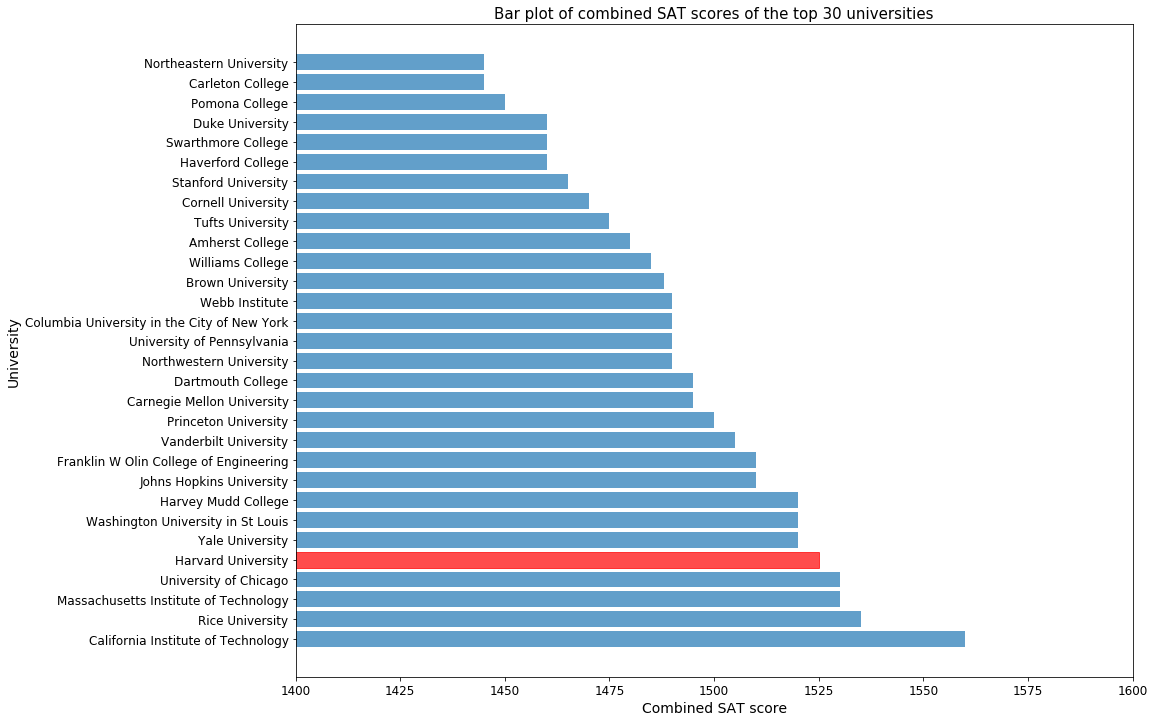

In [6]:
plt.figure(figsize=(15,12))
barlist = plt.barh(range(len(df_sat["Institution name"][:30])),df_sat["Combined SAT score"][:30],alpha=0.7)
barlist[4].set_color('r')
plt.xlabel("Combined SAT score",size=14)
plt.ylabel("University",size=14)
plt.yticks(range(len(df_sat["Institution name"][:30])),df_sat["Institution name"],size=12)
plt.xticks(size=12)
plt.xlim(1400,1600)
plt.title("Bar plot of combined SAT scores of the top 30 universities",size=15)
plt.show()

#### From the list and barplot above, you can see that when sorted based on combined SAT scores, some of the biggest universities make the cut with *California Institute of Technology* at the very top. *Harvard* sits at fifth spot while other renowned colleges such as *MIT* and *Yale* also make the top 10 in the list. Harvard is marked in Red in the graph. 

#### Next we can filter out colleges based on a SAT score cutoff point. For this we need to look at some more statistics such as how many colleges have higher scores at different thresholds. 

In [7]:
print ("Number of universities with a combined SAT score of above 1200: "+str(len(df_sat[df_sat["Combined SAT score"]>1200])))
print ("Number of universities with a combined SAT score of above 1100: "+str(len(df_sat[df_sat["Combined SAT score"]>1100])))
print ("Number of universities with a combined SAT score of above 1000: "+str(len(df_sat[df_sat["Combined SAT score"]>1000])))

Number of universities with a combined SAT score of above 1200: 256
Number of universities with a combined SAT score of above 1100: 604
Number of universities with a combined SAT score of above 1000: 1025


#### There are only 256 universities with a combined score of above 1200 for reading and math which is a rather small sample size. This number increases to 604 for a threshold of 1100 and skyrockets to 1025 for a score of 1000. For this first filtering step let's go with the 1200 threshold, which leaves us with 256 universities which is a good sample size for further analysis. 

#### Below we remove the unwanted instances using the threshold

In [8]:
df_sat = df_sat[df_sat["Combined SAT score"]>1200]
df_sat.shape

(256, 7)

#### Next we apply the 1025 filtered institutions to the larger dataset using the unique __UNIT IDs__ of each institution

In [9]:
df_filter = df.loc[df["UNITID"].isin(df_sat["ID"])]
df_filter.shape

(256, 1978)

#### Let's make sure that we have everything in the dataset

In [10]:
df_filter.head()

,UNITID,OPEID,OPEID6,INSTNM,CITY,STABBR,ZIP,ACCREDAGENCY,INSTURL,NPCURL,...,OMENRUP_NOTFIRSTTIME_POOLED_SUPP,OMENRYP_FULLTIME_POOLED_SUPP,OMENRAP_FULLTIME_POOLED_SUPP,OMAWDP8_FULLTIME_POOLED_SUPP,OMENRUP_FULLTIME_POOLED_SUPP,OMENRYP_PARTTIME_POOLED_SUPP,OMENRAP_PARTTIME_POOLED_SUPP,OMAWDP8_PARTTIME_POOLED_SUPP,OMENRUP_PARTTIME_POOLED_SUPP,SAT_combined
3,100706,105500,1055,University of Alabama in Huntsville,Huntsville,AL,35899,Southern Association of Colleges and Schools C...,www.uah.edu,finaid.uah.edu/,...,0.1593,0.0165,0.323,0.5361,0.1243,0.0245,0.3947,0.3476,0.2331,1205.0
9,100858,100900,1009,Auburn University,Auburn,AL,36849,Southern Association of Colleges and Schools C...,www.auburn.edu,https://www.auburn.edu/admissions/costcalc/fre...,...,0.072,0.0062,0.2026,0.7405,0.0506,0.0143,0.3829,0.4571,0.1457,1220.0
77,104151,108100,1081,Arizona State University-Tempe,Tempe,AZ,85287,Higher Learning Commission,www.asu.edu/,https://students.asu.edu/financialaid/net-price,...,0.1251,0.0107,0.1966,0.6893,0.1034,0.0185,0.2948,0.4796,0.2071,1235.0
89,104586,147902,1479,Embry-Riddle Aeronautical University-Prescott,Prescott,AZ,86301-3720,Southern Association of Colleges and Schools C...,prescott.erau.edu/,prescotterau.studentaidcalculator.com/survey.aspx,...,0.0851,0.0051,0.3151,0.6117,0.068,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,1240.0
147,107080,109900,1099,Hendrix College,Conway,AR,72032-3080,Higher Learning Commission,www.hendrix.edu,www.hendrix.edu/Admission/PriceCalculator/,...,0.0213,0.0011,0.282,0.7157,0.0011,NaN,NaN,NaN,NaN,1255.0


In [11]:
#Looking at highest undergraduate enrollments at each college
df_ugds = df.sort_values("UGDS",ascending=False)[["INSTNM","UGDS"]]

#Determining percentage of Asian students and sorting the colleges in descending order of percentage
df_asian = df_filter.sort_values("UGDS_ASIAN",ascending=False)[["INSTNM","UGDS_ASIAN","SAT_combined","ADM_RATE"]]

df_asian["Total enrollment"] = df_ugds["UGDS"]
df_asian["Number of Asian students"] = round(df_asian["UGDS_ASIAN"]*df_asian["Total enrollment"])
df_asian = df_asian.sort_values("SAT_combined",ascending=False)
df_asian.index = range(1,len(df_asian)+1)

#Converting the SAT,total enrollment and Asian enrollment values to integers for better reading
df_asian["Number of Asian students"] = list(map(int,df_asian["Number of Asian students"]))
df_asian["Total enrollment"] = list(map(int,df_asian["Total enrollment"]))
df_asian["SAT_combined"] = list(map(int,df_asian["SAT_combined"]))

#Finding the row for Harvard by simply looking for 'Harvard' under the institution name
df_asian_harvard = df_asian[df_asian.apply(lambda x: 'Harvard' in x[0],axis=1)]
df_asian.columns = ["Institution name","Asian enrollment percentage","Combined SAT score","Admission Rate","Total enrollment","Asian students enrollment"]
df_asian = df_asian.sort_values("Asian enrollment percentage",ascending=False)
df_asian.index = range(1,len(df_asian)+1)
df_asian.head()

,Institution name,Asian enrollment percentage,Combined SAT score,Admission Rate,Total enrollment,Asian students enrollment
1,California Institute of Technology,0.4329,1560,0.0774,961,416
2,University of the Sciences,0.3580,1213,0.6076,1268,454
3,University of California-Irvine,0.3568,1260,0.3651,29295,10452
4,University of California-San Diego,0.3461,1310,0.3399,28577,9890
5,University of California-Berkeley,0.3452,1370,0.1711,30574,10554


In [12]:
df_asian["Asian enrollment percentage"] = df_asian["Asian enrollment percentage"]*100
df_asian.loc[:,["Institution name","Asian enrollment percentage","Combined SAT score"]].head(10)

,Institution name,Asian enrollment percentage,Combined SAT score
1,California Institute of Technology,43.29,1560
2,University of the Sciences,35.80,1213
3,University of California-Irvine,35.68,1260
4,University of California-San Diego,34.61,1310
5,University of California-Berkeley,34.52,1370
6,CUNY Bernard M Baruch College,31.39,1270
7,The University of Texas at Dallas,31.01,1325
8,Carnegie Mellon University,30.87,1495
9,Emory University-Oxford College,29.83,1425
10,University of California-Davis,28.39,1245


#### We can now exactly see what the percentage of Asian students as well as the total number of Asian students at Harvard is. Now we can explore how these numbers compare with the other top colleges. 

In [13]:
#Colleges with higher number of Asian students
print ("Colleges with higher number of Asian students than Harvard ",sum(df_asian["Asian students enrollment"]>int(df_asian_harvard["Number of Asian students"])))
print ("Colleges with lesser number of Asian students than Harvard ",sum(df_asian["Asian students enrollment"]<int(df_asian_harvard["Number of Asian students"])))
print ("Harvard lies in the "+str(round(((sum(df_asian["Asian students enrollment"]<int(df_asian_harvard["Number of Asian students"])))/df_asian.shape[0])*100))+"th percentile when it comes to highest enrollment of Asian students among the top 256 colleges")
df_asian.shape

Colleges with higher number of Asian students than Harvard  53
Colleges with lesser number of Asian students than Harvard  202
Harvard lies in the 79th percentile when it comes to highest enrollment of Asian students among the top 256 colleges


(256, 6)

#### Harvard ranks at 54 when it comes to Asian students enrollment based purely on total numbers. To get a better idea of the situation, we can repeat the same exercise but this time with the percentage out of the total enrollment at the college. The percentage makes more sense in this case since admission to Harvard tends to be extremely selective therefore rating it based on total numbers would be unfair. 

In [14]:
#Colleges with higher number of Asian students
print ("Colleges with higher percentage of Asian students than Harvard ",sum(df_asian["Asian enrollment percentage"]>float(df_asian_harvard["UGDS_ASIAN"]*100)))
print ("Colleges with lesser percentage of Asian students than Harvard ",sum(df_asian["Asian enrollment percentage"]<float(df_asian_harvard["UGDS_ASIAN"]*100)))
print ("Harvard lies in the "+str(round(((sum(df_asian["Asian enrollment percentage"]<float(df_asian_harvard["UGDS_ASIAN"]*100)))/df_asian.shape[0])*100))+"th percentile when it comes to highest enrollment percentage of Asian students among the top 256 colleges")
df_asian.shape

Colleges with higher percentage of Asian students than Harvard  34
Colleges with lesser percentage of Asian students than Harvard  221
Harvard lies in the 86th percentile when it comes to highest enrollment percentage of Asian students among the top 256 colleges


(256, 6)

In [15]:
print ("Harvard's Asian enrollment percentage percentile: ",st.percentileofscore(df_asian["Asian enrollment percentage"],float(df_asian_harvard["UGDS_ASIAN"]*100)))

Harvard's Asian enrollment percentage percentile:  86.71875


#### When the Asian enrollment percentage is taken into account, it provides better reading for Harvard as their percentile goes up from 79 to a respectable 86. Only 34 schools have a higher Asian percentage than Harvard. Some might argue that this number is too high especially considering the fact that Harvard is not only one of the top institutions of the US but also of the world. 

#### Let's take a look at some of the schools that made the cut above Harvard when it comes to Asian enrollment percentage. 

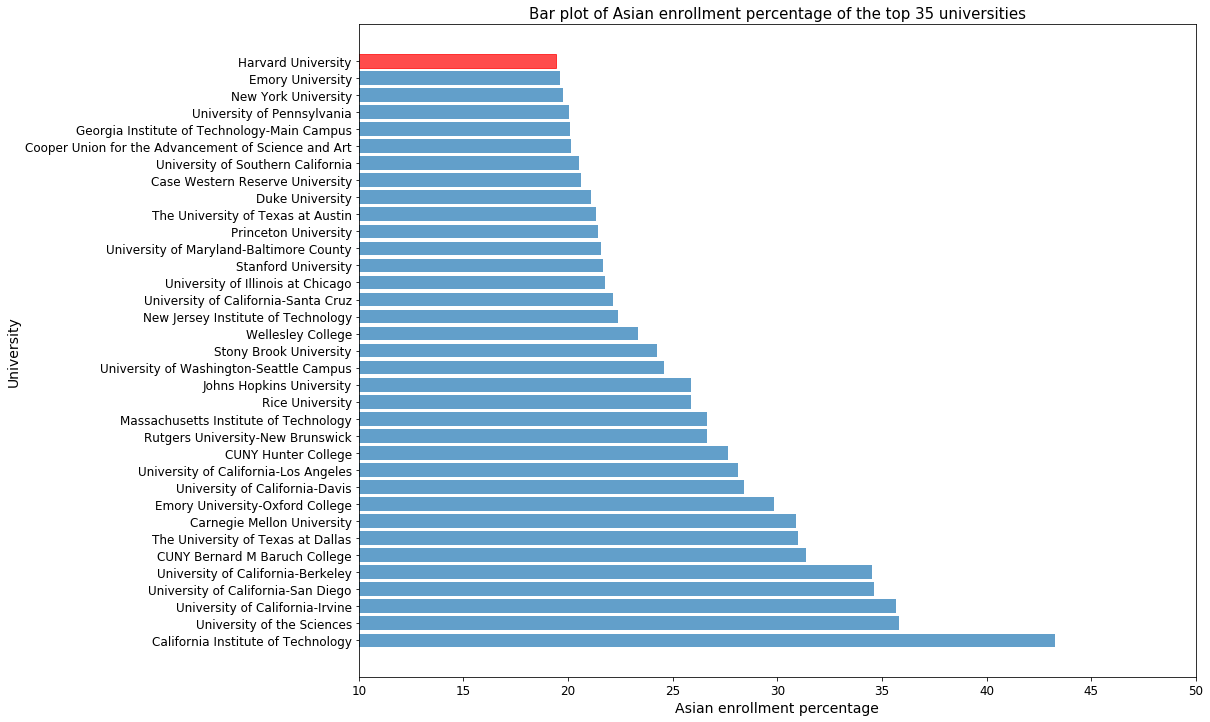

In [16]:
#Sorting by enrollment percentage to get new rankings
df_asian_percent = df_asian.sort_values("Asian enrollment percentage",ascending=False)
df_asian_percent.index = range(1,len(df_asian_percent)+1)

plt.figure(figsize=(15,12))
barlist = plt.barh(range(len(df_asian_percent["Institution name"][:35])),df_asian_percent["Asian enrollment percentage"][:35],alpha=0.7)
barlist[34].set_color('r')
plt.xlabel("Asian enrollment percentage",size=14)
plt.ylabel("University",size=14)
plt.yticks(range(len(df_asian_percent["Institution name"][:35])),df_asian_percent["Institution name"],size=12)
plt.xticks(size=12)
plt.xlim(10,50)
plt.title("Bar plot of Asian enrollment percentage of the top 35 universities",size=15)
plt.show()

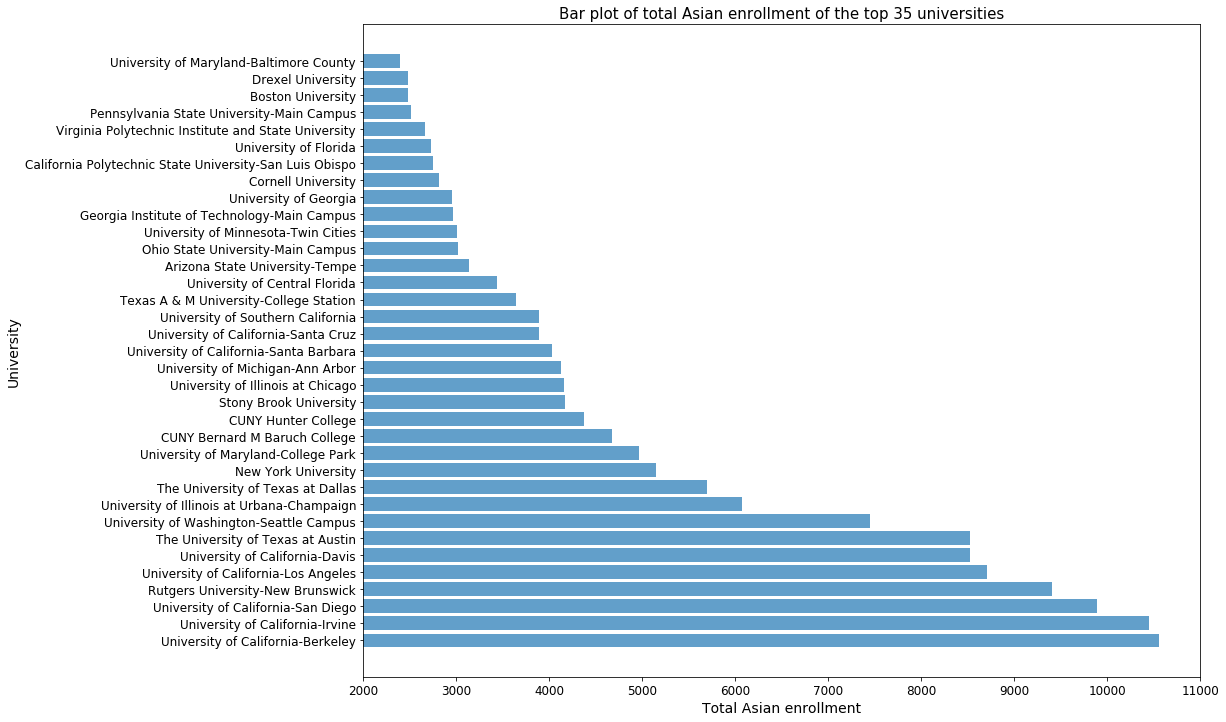

In [17]:
#Sorting by enrollment percentage to get new rankings
df_asian_enroll = df_asian.sort_values("Asian students enrollment",ascending=False)
df_asian_enroll.index = range(1,len(df_asian_enroll)+1)

plt.figure(figsize=(15,12))
barlist = plt.barh(range(len(df_asian_enroll["Institution name"][:35])),df_asian_enroll["Asian students enrollment"][:35],alpha=0.7)
#barlist[34].set_color('r')
plt.xlabel("Total Asian enrollment",size=14)
plt.ylabel("University",size=14)
plt.yticks(range(len(df_asian_enroll["Institution name"][:35])),df_asian_enroll["Institution name"],size=12)
plt.xticks(size=12)
plt.xlim(2000,11000)
plt.title("Bar plot of total Asian enrollment of the top 35 universities",size=15)
plt.show()

In [18]:
df_asian_enroll.loc[:,["Institution name","Asian students enrollment","Combined SAT score"]].head(10)

,Institution name,Asian students enrollment,Combined SAT score
1,University of California-Berkeley,10554,1370
2,University of California-Irvine,10452,1260
3,University of California-San Diego,9890,1310
4,Rutgers University-New Brunswick,9406,1295
5,University of California-Los Angeles,8709,1335
6,University of California-Davis,8530,1245
7,The University of Texas at Austin,8521,1340
8,University of Washington-Seattle Campus,7450,1305
9,University of Illinois at Urbana-Champaign,6070,1420
10,The University of Texas at Dallas,5698,1325


In [19]:
#Retrieving the information for just Harvard
harvard = df_asian_enroll[df_asian_enroll.apply(lambda x: "Harvard" in x[0],axis=1)]
print (harvard)

      Institution name  Asian enrollment percentage  Combined SAT score  \
54  Harvard University                        19.42                1525   

    Admission Rate  Total enrollment  Asian students enrollment  
54          0.0516              7532                       1463  


In [20]:
#Calculating Harvard's total Asian enrollment percentile
print ("Harvard's Asian enrollment percentage percentile: ",st.percentileofscore(df_asian["Asian students enrollment"],float(harvard["Asian students enrollment"])))

Harvard's Asian enrollment percentage percentile:  79.296875


In [21]:
df_asian_percent.head(35)

,Institution name,Asian enrollment percentage,Combined SAT score,Admission Rate,Total enrollment,Asian students enrollment
1,California Institute of Technology,43.29,1560,0.0774,961,416
2,University of the Sciences,35.80,1213,0.6076,1268,454
3,University of California-Irvine,35.68,1260,0.3651,29295,10452
4,University of California-San Diego,34.61,1310,0.3399,28577,9890
5,University of California-Berkeley,34.52,1370,0.1711,30574,10554
6,CUNY Bernard M Baruch College,31.39,1270,0.2925,14903,4678
7,The University of Texas at Dallas,31.01,1325,0.7603,18375,5698
8,Carnegie Mellon University,30.87,1495,0.2220,6434,1986
9,Emory University-Oxford College,29.83,1425,0.2894,979,292
10,University of California-Davis,28.39,1245,0.4336,30046,8530


In [22]:
print (df_asian_percent.sort_values("Asian enrollment percentage",ascending=False).head()["Institution name"])
print (df_asian_percent.sort_values("Combined SAT score",ascending=False).head()["Institution name"])
print (df_asian_percent.sort_values("Asian students enrollment",ascending=False).head()["Institution name"])

1    California Institute of Technology
2            University of the Sciences
3       University of California-Irvine
4    University of California-San Diego
5     University of California-Berkeley
Name: Institution name, dtype: object
1        California Institute of Technology
15                          Rice University
14    Massachusetts Institute of Technology
40                    University of Chicago
35                       Harvard University
Name: Institution name, dtype: object
5        University of California-Berkeley
3          University of California-Irvine
4       University of California-San Diego
13        Rutgers University-New Brunswick
11    University of California-Los Angeles
Name: Institution name, dtype: object


#### California Institute of Technology leads the pack with a staggering 43.29% Asian enrollment followed by University of the Sciences at 35.8%. Harvard, as we determined earlier, sits at number 35 with a score of 19.42%. This can also be seen on the barplot with Harvard marked in *Red*.

#### Now that we have a slightly better understanding of the rankings, let's compare these universities using the three main variables in our analysis - total Asian enrollment, Asian enrollment percentage and combined SAT score. 

#### For a fun experiment we can see how the rankings of the top colleges change when we switch between the three variables stated above and then compare these changes with that of Harvard. In order to do this we take the initial data (ordered by SAT scores) and then determine how the rankings for each university change when sorted by enrollment percentage and total enrollment respectively. 

## Creating datasets for each type of ranking

#### Here we create the three datasets each one sorted by a different variable:
- SAT score
- Total Asian enrollment
- Asian enrollment percentage

#### Each sorted dataset is then indexed starting from 1 and then sorted again based on college names. Once that is done, we get 3 lists of ranks which can be referenced by the college names. 

### Ordered by SAT score

In [23]:
#Sorting based on college name
df_asian_percent = df_asian_percent.sort_values("Combined SAT score",ascending=False)
df_asian_percent.index = range(1,len(df_asian_percent.index)+1)
df_asian_percent = df_asian_percent.sort_values("Institution name")
sat_rank = df_asian_percent.index
df_asian_percent.head()

,Institution name,Asian enrollment percentage,Combined SAT score,Admission Rate,Total enrollment,Asian students enrollment
205,Allegheny College,2.83,1230,0.6789,1764,50
158,American University,7.18,1265,0.2940,7433,534
21,Amherst College,14.28,1480,0.1290,1835,262
204,Arizona State University-Tempe,7.45,1235,0.8415,42181,3142
221,Auburn University,2.40,1220,0.8393,23391,561


### Ordered by Asian enrollment percentage

In [24]:
df_asian_percent = df_asian_percent.sort_values("Asian enrollment percentage",ascending=False)
df_asian_percent.index = range(1,len(df_asian_percent.index)+1)
df_asian_percent = df_asian_percent.sort_values("Institution name")
percent_rank = df_asian_percent.index
df_asian_percent.head()

,Institution name,Asian enrollment percentage,Combined SAT score,Admission Rate,Total enrollment,Asian students enrollment
220,Allegheny College,2.83,1230,0.6789,1764,50
124,American University,7.18,1265,0.2940,7433,534
59,Amherst College,14.28,1480,0.1290,1835,262
122,Arizona State University-Tempe,7.45,1235,0.8415,42181,3142
227,Auburn University,2.40,1220,0.8393,23391,561


### Ordered by total Asian enrollment

In [25]:
#df_asian_enrollment = df_asian.sort_values("Asian students enrollment",ascending=False)
#df_asian_enrollment.index = range(1,len(df_asian_percent.index)+1)
#df_asian_enrollment = df_asian_enrollment.sort_values("Institution name")
#enrollment_rank = df_asian_enrollment.index
df_asian_percent = df_asian_percent.sort_values("Asian students enrollment",ascending=False)
df_asian_percent.index = range(1,len(df_asian_percent.index)+1)
df_asian_percent = df_asian_percent.sort_values("Institution name")
enrollment_rank = df_asian_percent.index
df_asian_percent.head()

,Institution name,Asian enrollment percentage,Combined SAT score,Admission Rate,Total enrollment,Asian students enrollment
231,Allegheny College,2.83,1230,0.6789,1764,50
109,American University,7.18,1265,0.2940,7433,534
142,Amherst College,14.28,1480,0.1290,1835,262
23,Arizona State University-Tempe,7.45,1235,0.8415,42181,3142
106,Auburn University,2.40,1220,0.8393,23391,561


#### The three rank lists can now be put together into one dataset and referenced by the college name which can be included as the index

In [26]:
df_rank = pd.DataFrame()
df_rank["SAT rank"] = sat_rank
df_rank["Enrollment rank"] = enrollment_rank
df_rank["Percent rank"] = percent_rank
df_rank.index = df_asian_percent["Institution name"]
df_rank.head()

,SAT rank,Enrollment rank,Percent rank
Institution name,,,
Allegheny College,205,231,220
American University,158,109,124
Amherst College,21,142,59
Arizona State University-Tempe,204,23,122
Auburn University,221,106,227


#### Let's verify the rankings before proceeding with the analysis

In [27]:
print (df_rank.sort_values("SAT rank").head())
print (df_rank.sort_values("Enrollment rank").head())
print (df_rank.sort_values("Percent rank").head())

                                       SAT rank  Enrollment rank  Percent rank
Institution name                                                              
California Institute of Technology            1              119             1
Rice University                               2               71            15
Massachusetts Institute of Technology         3               65            14
University of Chicago                         4               67            40
Harvard University                            5               54            35
                                      SAT rank  Enrollment rank  Percent rank
Institution name                                                             
University of California-Berkeley           69                1             5
University of California-Irvine            161                2             3
University of California-San Diego         105                3             4
Rutgers University-New Brunswick           118           

#### Looks like we are good to go. Let's sort the dataset by SAT score to make that a reference.

In [28]:
df_rank = df_rank.sort_values("SAT rank")
df_rank.head()

,SAT rank,Enrollment rank,Percent rank
Institution name,,,
California Institute of Technology,1,119,1
Rice University,2,71,15
Massachusetts Institute of Technology,3,65,14
University of Chicago,4,67,40
Harvard University,5,54,35


#### One way to analyze the rankings is to find the correlation between them. We can separate the analysis into 2 groups: 
- SAT vs enrollment
- SAT vs percent

### SAT vs Enrollment

#### First we see if there is any correlation between the two sets of rankings. So we are basically trying to find out if a higher ranked college would have a higher enrollment. 

Correlation : 0.236544403754


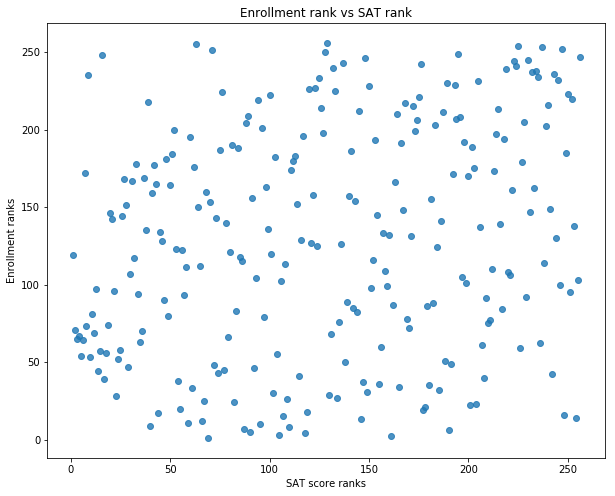

In [29]:
print ("Correlation :",np.corrcoef(df_rank["SAT rank"],df_rank["Enrollment rank"])[0][1])

plt.figure(figsize=(10,8))
plt.scatter(df_rank["SAT rank"],df_rank["Enrollment rank"],alpha=0.8)
plt.xlabel("SAT score ranks")
plt.ylabel("Enrollment ranks")
plt.title("Enrollment rank vs SAT rank")
plt.show()

#### The correlation score of 0.239 is extremely low and the graph shows that there is no association between the two variables. 

In [30]:
df_rank["SAT_enrollment"] = df_rank["SAT rank"] - df_rank["Enrollment rank"]
df_rank.head()

,SAT rank,Enrollment rank,Percent rank,SAT_enrollment
Institution name,,,,
California Institute of Technology,1,119,1,-118
Rice University,2,71,15,-69
Massachusetts Institute of Technology,3,65,14,-62
University of Chicago,4,67,40,-63
Harvard University,5,54,35,-49


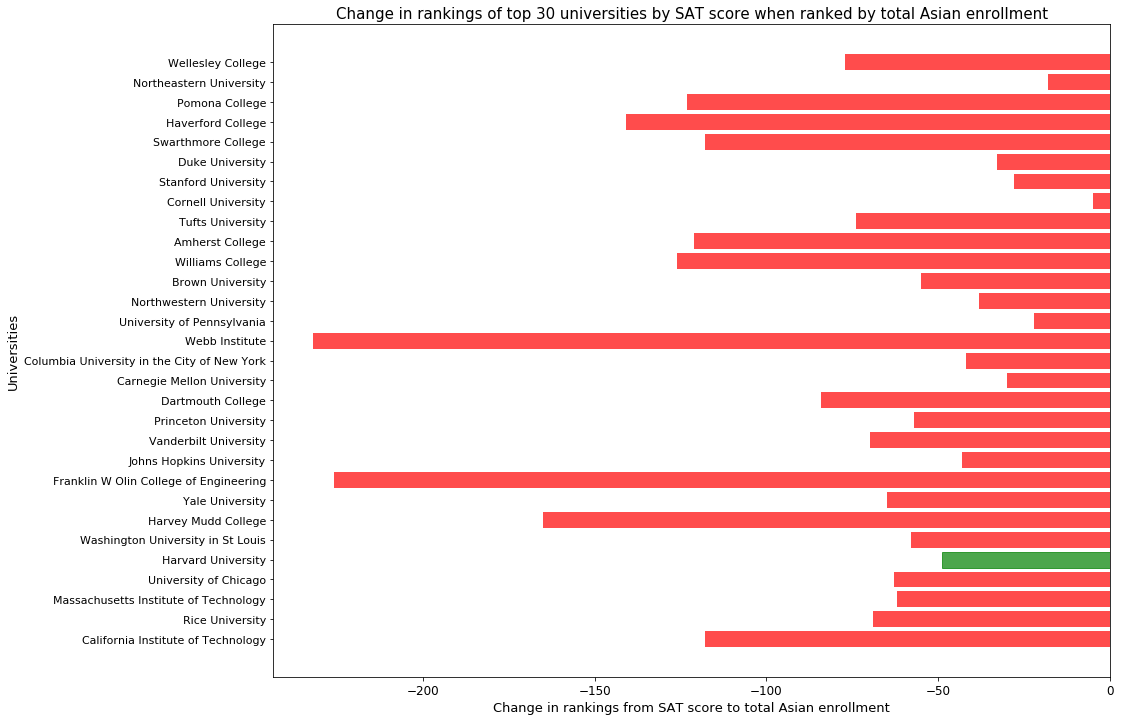

In [31]:
plt.figure(figsize=(15,12))
barlist = plt.barh(range(len(df_rank))[:30],df_rank["SAT_enrollment"][:30],color='red',alpha=0.7)
barlist[4].set_color('g')
plt.xlabel("Change in rankings from SAT score to total Asian enrollment",size=13)
plt.ylabel("Universities",size=13)
plt.title("Change in rankings of top 30 universities by SAT score when ranked by total Asian enrollment",size=15)
plt.yticks(range(len(df_rank))[:30],list(df_rank.index[:30]),size=11)
plt.xticks(size=12)
plt.show()

#### Finally, we have the graph we were looking for. Analysing just the top 30 schools (SAT score), we can immediately see that all of the schools have a drop in ranking when ordered by total Asian enrollment. From the graph, it appears that the biggest negative values exist for the lesser renowned schools with Webb Institute seeing the most change followed by Franklin W Olin College of Engineering, Harvey Mudd College and Haverford College. These colleges either have a relatively small Asian enrollment or their SAT scores are really high. 

#### Harvard, our point of interest, actually sees a relatively small shift of around -50 spots. Harvard can be identified by the *Green* bar. 



#### In order to get the exact numbers, we can sort the dataset based on the change in rankings. 

In [32]:
#Sorting the dataset by "SAT_enrollment"
df_rank_enrollment_change = df_rank.sort_values("SAT_enrollment")
df_rank_enrollment_change.head(30)

,SAT rank,Enrollment rank,Percent rank,SAT_enrollment
Institution name,,,,
Webb Institute,16,248,85,-232
Franklin W Olin College of Engineering,9,235,80,-226
Jewish Theological Seminary of America,63,255,254,-192
St. John's College,71,251,235,-180
Washington and Lee University,39,218,208,-179
Harvey Mudd College,7,172,43,-165
Kenyon College,76,224,210,-148
Reed College,52,200,143,-148
Hamilton College,33,178,125,-145


#### Now we can clearly see the numbers which were not absolutely clear from the graph. From the data you can see that for the top 2 (Webb and Franklin), the SAT rankings are really good (within top 10) and their Asian enrollment rankings are some of the worst at 248 and 235 respectively. 

### SAT vs Percentage

Correlation : 0.514970531014


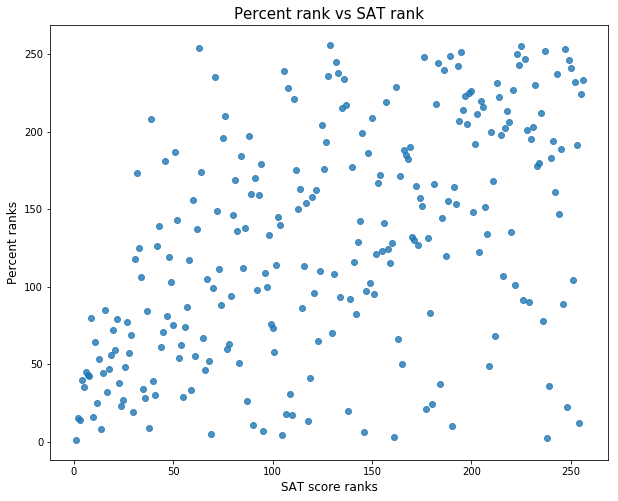

In [33]:
print ("Correlation :",np.corrcoef(df_rank["SAT rank"],df_rank["Percent rank"])[0][1])

plt.figure(figsize=(10,8))
plt.scatter(df_rank["SAT rank"],df_rank["Percent rank"],alpha=0.8)
plt.xlabel("SAT score ranks",size=12)
plt.ylabel("Percent ranks",size=12)
plt.title("Percent rank vs SAT rank",size=15)
plt.show()

#### These two variables have a relatively better association with a 0.516 correlation score. Also, the graph shows that there is a __slight positive__ trend between the two variables but it's weak and not exactly linear. Therefore, it can't be said that there is any tangible association between the two variables after all

In [34]:
df_rank["SAT_percentage"] = df_rank["SAT rank"] - df_rank["Percent rank"]
df_rank.head()

,SAT rank,Enrollment rank,Percent rank,SAT_enrollment,SAT_percentage
Institution name,,,,,
California Institute of Technology,1,119,1,-118,0
Rice University,2,71,15,-69,-13
Massachusetts Institute of Technology,3,65,14,-62,-11
University of Chicago,4,67,40,-63,-36
Harvard University,5,54,35,-49,-30


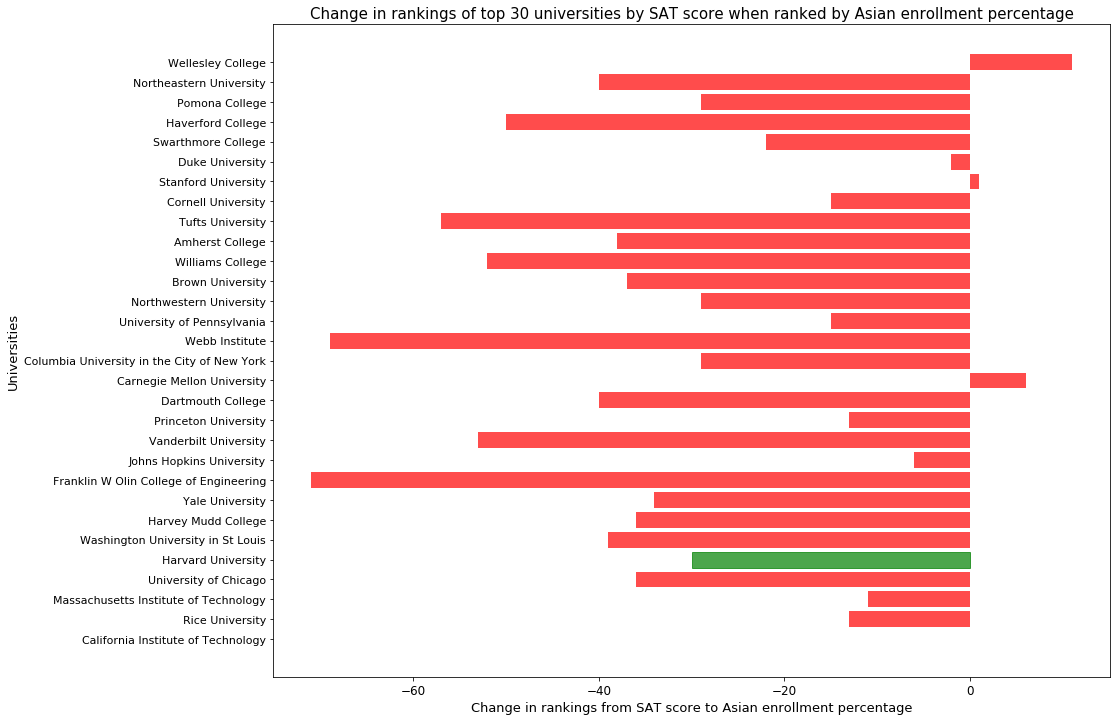

In [35]:
plt.figure(figsize=(15,12))
barlist = plt.barh(range(len(df_rank))[:30],df_rank["SAT_percentage"][:30],color='red',alpha=0.7)
barlist[4].set_color('g')
plt.xlabel("Change in rankings from SAT score to Asian enrollment percentage",size=13)
plt.ylabel("Universities",size=13)
plt.title("Change in rankings of top 30 universities by SAT score when ranked by Asian enrollment percentage",size=15)
plt.yticks(range(len(df_rank))[:30],list(df_rank.index[:30]),size=11)
plt.xticks(size=12)
plt.show()

In [36]:
#Sorting the dataset by "SAT_enrollment"
df_rank_enrollment_change = df_rank.sort_values("SAT_percentage")
df_rank_enrollment_change.head(30)

,SAT rank,Enrollment rank,Percent rank,SAT_enrollment,SAT_percentage
Institution name,,,,,
Jewish Theological Seminary of America,63,255,254,-192,-191
Washington and Lee University,39,218,208,-179,-169
St. John's College,71,251,235,-180,-164
University of Notre Dame,32,117,173,-85,-141
Colgate University,51,184,187,-133,-136
Tulane University of Louisiana,46,128,181,-82,-135
Kenyon College,76,224,210,-148,-134
Brigham Young University-Provo,106,102,239,4,-133
Yeshiva University,129,256,256,-127,-127


#### Once again, out of the top 30 schools by SAT score, most of them have a drop in rankings when compared to Asian enrollment percentage while only 3 universities have a positive change - Stanford, Wellesley and Carnegie Mellon but only by a few points which tells us that their Asian percentage ranks are comparable to their respective SAT score rankings. Amazingly, California Institute of Technology sees no movement in rankings which is a little hard to see on the graph as there's no bar present for it. 

#### The highest drop is around -70 which is Franklin W Olin College of Engineering. Interestingly, both Frankling and Webb Institute re-appear as two of the higher drops in this dataset as well. In this case, however, it's mostly due to their high SAT rankings as opposed to a lower ranking in Asian enrollment percentage. 

#### From the data above, Jewish Theological Seminary of America and Washingt and Lee University see the most negative changes followed by Notre Dame and Colgate University. For the top 2, their drop in rankings has mostly to do with their relatively low Asian percentage at 258 and 208 respectively. 

#### Harvard is marked in Green once again and shows a change of just -30 points. One way to truly get a measure of Harvard's Asian enrollment is by comparing it with other prestigious schools. We do this in two ways:
- Comparing Harvard with other colleges with the lowest admission rates
- Comparing Harvard with other Ivy League schools

## Lowest admission rates analysis

#### To get a meaningful dataset, the original dataset is filtered to contain only colleges that have an admission rate and asian enrollment percentage of greater than 0. Then, the top 30 schools based on admission rate are picked for analysis

In [37]:
df_adm = df[(df["ADM_RATE"]>0.0)&(df["UGDS_ASIAN"]>0.0)] #Removing colleges with admission rates equal to 0

df_adm_256 = df_adm.sort_values("ADM_RATE")[["INSTNM","ADM_RATE","UGDS_ASIAN","UGDS"]][:256]
df_adm_256.index = range(1,len(df_adm_256)+1)
df_adm_256.columns = ["Institution name","Admission rate","Asian enrollment percentage","Total enrollment"]
df_adm_256["Admission rate"] = df_adm_256["Admission rate"]*100
df_adm_256["Asian enrollment percentage"] = df_adm_256["Asian enrollment percentage"]*100

df_adm = df_adm.sort_values("ADM_RATE")[["INSTNM","ADM_RATE","UGDS_ASIAN","UGDS"]][:30]
df_adm.index = range(1,len(df_adm)+1)
df_adm.columns = ["Institution name","Admission rate","Asian enrollment percentage","Total enrollment"]
df_adm["Admission rate"] = df_adm["Admission rate"]*100
df_adm["Asian enrollment percentage"] = df_adm["Asian enrollment percentage"]*100
df_adm.loc[:,["Institution name","Admission rate","Asian enrollment percentage"]].head(10)

,Institution name,Admission rate,Asian enrollment percentage
1,Curtis Institute of Music,3.30,22.14
2,Stanford University,4.73,21.67
3,Harvard University,5.16,19.42
4,The Juilliard School,5.92,12.35
5,Princeton University,6.41,21.44
6,Columbia University in the City of New York,6.61,17.33
7,Yale University,6.93,17.62
8,Massachusetts Institute of Technology,7.17,26.62
9,California Institute of Technology,7.74,43.29
10,Pomona College,8.36,14.68


#### As expected, you have the usual suspects such as Stanford, Harvard and Princeton at the top of the table but you also see other lesser known college such as Juilliard School and Ponoma College make the top 10 while Curtis Institute of Music tops the list with an admission rate of 3.3%. 

In [38]:
df_adm = df_adm.sort_values("Asian enrollment percentage",ascending=False)
df_adm.index = range(1,len(df_adm)+1)
df_adm.loc[:,["Institution name","Admission rate","Asian enrollment percentage"]].head(10)

,Institution name,Admission rate,Asian enrollment percentage
1,California Institute of Technology,7.74,43.29
2,Massachusetts Institute of Technology,7.17,26.62
3,Johns Hopkins University,12.54,25.87
4,Curtis Institute of Music,3.30,22.14
5,Stanford University,4.73,21.67
6,Princeton University,6.41,21.44
7,Duke University,9.86,21.09
8,Cooper Union for the Advancement of Science an...,13.05,20.14
9,University of Pennsylvania,9.30,20.05
10,Harvard University,5.16,19.42


#### The dataset is then sorted by Asian enrollment percentage to find out where Harvard sits when it comes to colleges with the lowest admission rates. 

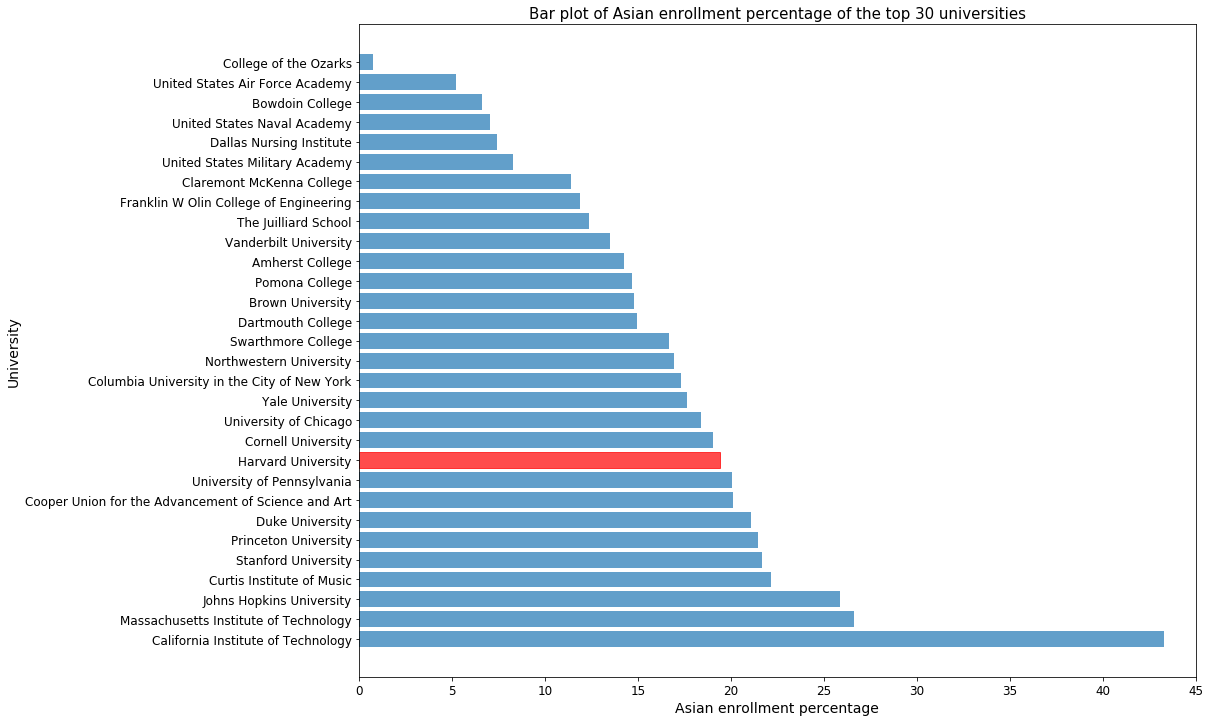

In [39]:
#Sorting by enrollment percentage to get new rankings
plt.figure(figsize=(15,12))
barlist = plt.barh(range(len(df_adm["Institution name"])),df_adm["Asian enrollment percentage"],alpha=0.7)
barlist[9].set_color('r')
plt.xlabel("Asian enrollment percentage",size=14)
plt.ylabel("University",size=14)
plt.yticks(range(len(df_adm["Institution name"])),df_adm["Institution name"],size=12)
plt.xticks(size=12)
plt.xlim(0,45)
plt.title("Bar plot of Asian enrollment percentage of the top 30 universities",size=15)
plt.show()

#### From the graph above, Harvard (shown in red) sits at number 10 when it comes to Asian enrollment percentage among the top 30 schools with the lowest admission rates. 

Harvard's Asian enrollment percentage percentile:  70.0
Harvard's Asian enrollment percentage percentile:  87.109375
Asian enrollment percent distribution mean:  8.776054687500002
Asian enrollment percent distribution median:  5.405


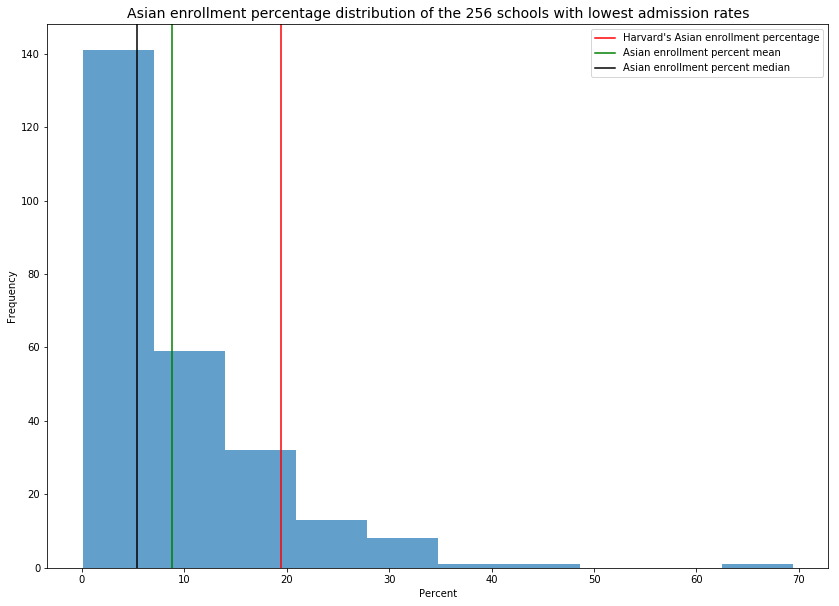

In [40]:
#Calculating Harvard's Asian enrollment percentage percentile among 30 lowest admission rate schools
print ("Harvard's Asian enrollment percentage percentile: ",st.percentileofscore(df_adm["Asian enrollment percentage"],float(harvard["Asian enrollment percentage"])))
print ("Harvard's Asian enrollment percentage percentile: ",st.percentileofscore(df_adm_256["Asian enrollment percentage"],float(harvard["Asian enrollment percentage"])))
print ("Asian enrollment percent distribution mean: ",np.mean(df_adm_256["Asian enrollment percentage"]))
print ("Asian enrollment percent distribution median: ",np.percentile(df_adm_256["Asian enrollment percentage"],50))

plt.figure(figsize=(14,10))
plt.hist(df_adm_256["Asian enrollment percentage"],alpha=0.7)
plt.axvline(19.42,color='r',label="Harvard's Asian enrollment percentage")
plt.axvline(np.mean(df_adm_256["Asian enrollment percentage"]),color='g',label='Asian enrollment percent mean')
plt.axvline(np.percentile(df_adm_256["Asian enrollment percentage"],50),color='black',label='Asian enrollment percent median')
plt.title("Asian enrollment percentage distribution of the 256 schools with lowest admission rates",size=14)
plt.xlabel("Percent")
plt.ylabel("Frequency")
plt.legend()
plt.show()

#### Above, we have plotted a histogram of the Asian enrollment percentage for the lowest 256 colleges. We picked 256 since the analysis with the SAT scores was done with the same number. As expected from a right skewed distribution, the mean is higher than the median. Another thingto note is that Harvard falls in the 87.11 percentile of the above distribution. 

## Ivy League analysis

Here are the eight Ivy League colleges: 
- Brown University
- Harvard
- University of Pennsylvania
- Yale
- Princeton
- Dartmouth
- Columbia
- Cornell

The first thing to do is to extract these colleges from the larger dataset. Let's try to get them using the generic names for these colleges. 

In [41]:
ivy_league = ["Harvard","Cornell","Dartmouth","Columbia","University of Pennsylvania","Princeton","Brown University","Yale"]
df_reduced = df.loc[:,['INSTNM','UGDS','UGDS_ASIAN','ADM_RATE']]
df_ivy = pd.DataFrame(columns=df_reduced.columns)
for i in ivy_league:
    college = df_reduced[df_reduced.apply(lambda x: i in x['INSTNM'],axis=1)]
    df_ivy = df_ivy.append(pd.DataFrame(college))
    
df_ivy.columns = ["Institution name","Total enrollment","Asian enrollment percentage","Admission rate"]
df_ivy

,Institution name,Total enrollment,Asian enrollment percentage,Admission rate
1549,Harvard University,7532.0,0.1942,0.0516
1151,Cornell College,1004.0,0.0349,0.6503
2230,Cornell University,14815.0,0.1902,0.1267
2231,Weill Cornell Medical College,NaN,NaN,NaN
1608,University of Massachusetts-Dartmouth,6559.0,0.0364,0.8427
2027,Dartmouth College,4315.0,0.1497,0.1045
275,Columbia College,2216.0,0.0108,NaN
276,Columbia College Hollywood,453.0,0.0464,0.4953
642,University of the District of Columbia,3606.0,0.0189,NaN
648,Strayer University-District of Columbia,687.0,0.0102,NaN


#### That wasn't a good idea as we got 102 colleges that share the same generic names. Let's see if we can sort them by *ADM_RATE* to see if we can find the names we are looking for. The reasoning behind this is that the Ivy League colleges are expected to have relatively lower admission rates. Let's find out if this theory holds true. 

In [42]:
df_ivy = df_ivy.sort_values("Admission rate")
df_ivy.head(20)

,Institution name,Total enrollment,Asian enrollment percentage,Admission rate
1549,Harvard University,7532.0,0.1942,0.0516
2112,Princeton University,5246.0,0.2144,0.0641
2222,Columbia University in the City of New York,8170.0,0.1733,0.0661
630,Yale University,5742.0,0.1762,0.0693
3175,Brown University,6670.0,0.1477,0.0849
3093,University of Pennsylvania,10660.0,0.2005,0.0930
2027,Dartmouth College,4315.0,0.1497,0.1045
2230,Cornell University,14815.0,0.1902,0.1267
3207,Columbia International University,491.0,0.0204,0.2825
5739,Flashpoint Chicago A Campus of Columbia Colleg...,314.0,0.0382,0.3896


#### That actually worked! Now we can filter out the first 10 entries from this sorted dataframe to get our Ivy League dataset. 

In [43]:
df_ivy = df_ivy.iloc[:8,:]
df_ivy.index = range(1,len(df_ivy)+1)
df_ivy["Asian enrollment percentage"] = df_ivy["Asian enrollment percentage"]*100
df_ivy.loc[:,["Institution name","Asian enrollment percentage"]]

,Institution name,Asian enrollment percentage
1,Harvard University,19.42
2,Princeton University,21.44
3,Columbia University in the City of New York,17.33
4,Yale University,17.62
5,Brown University,14.77
6,University of Pennsylvania,20.05
7,Dartmouth College,14.97
8,Cornell University,19.02


#### We can immediately see that Harvard in fact has the lowest admission rate out of the 8 prestigious universities at an astonishing 5.16%. 

#### Now we can sort the dataset by the Asian enrollment percentage and also visualize the results

In [44]:
df_ivy.iloc[2,0] = "Columbia"
df_ivy = df_ivy.sort_values("Asian enrollment percentage",ascending=False)
df_ivy.index = range(1,len(df_ivy)+1)
df_ivy.loc[:,["Institution name","Asian enrollment percentage"]]

,Institution name,Asian enrollment percentage
1,Princeton University,21.44
2,University of Pennsylvania,20.05
3,Harvard University,19.42
4,Cornell University,19.02
5,Yale University,17.62
6,Columbia,17.33
7,Dartmouth College,14.97
8,Brown University,14.77


#### Harvard sit's at number 3 when it comes to the enrollment percentage of Asian students. I have to say that I was not expecting that. Let's see what the total Asian enrollment looks like. 

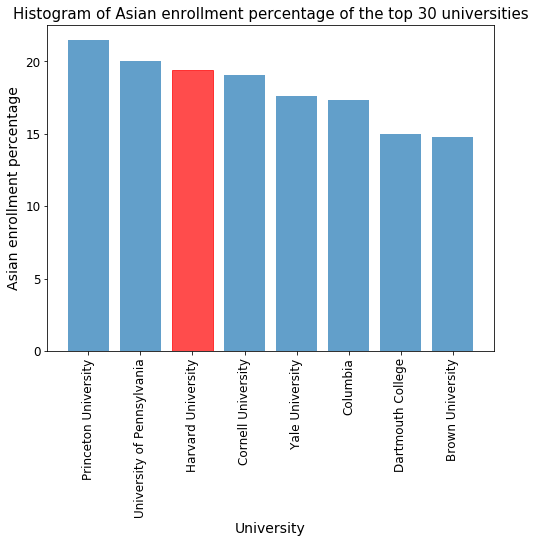

In [45]:
#Sorting by enrollment percentage to get new rankings
plt.figure(figsize=(8,6))
barlist = plt.bar(range(len(df_ivy["Institution name"])),df_ivy["Asian enrollment percentage"],alpha=0.7)
barlist[2].set_color('r')
plt.ylabel("Asian enrollment percentage",size=14)
plt.xlabel("University",size=14)
plt.xticks(range(len(df_ivy["Institution name"])),df_ivy["Institution name"],size=12,rotation=90)
plt.yticks(size=12)
plt.title("Histogram of Asian enrollment percentage of the top 30 universities",size=15)
plt.show()

In [46]:
df_ivy["Asian enrollment"] = df_ivy["Asian enrollment percentage"]*df_ivy["Total enrollment"]
df_ivy = df_ivy.sort_values("Asian enrollment",ascending=False)
df_ivy.index = range(1,len(df_ivy)+1)
df_ivy

,Institution name,Total enrollment,Asian enrollment percentage,Admission rate,Asian enrollment
1,Cornell University,14815.0,19.02,0.1267,281781.30
2,University of Pennsylvania,10660.0,20.05,0.0930,213733.00
3,Harvard University,7532.0,19.42,0.0516,146271.44
4,Columbia,8170.0,17.33,0.0661,141586.10
5,Princeton University,5246.0,21.44,0.0641,112474.24
6,Yale University,5742.0,17.62,0.0693,101174.04
7,Brown University,6670.0,14.77,0.0849,98515.90
8,Dartmouth College,4315.0,14.97,0.1045,64595.55


#### The rankings change a little when it comes to total Asian enrollment but Harvard still sits in third spot. 

## Statistical inference

#### Now that we have an idea regarding the distribution of universities based on different factors such as the admission rate, SAT score and Asian enrollment, let's do some statistical analysis to find out whether Harvard's Asian enrollment is comparable to other schools of similar stature and credentials

#### To do this, first we need to define the population using which we can do our test. A good population to choose from would be universities whose combined SAT scores are above 1200. The metric that we would be using is the Asian students enrollment percentage or the *UGDS_ASIAN* variable. 

In [47]:
df_sat.shape

(256, 7)

#### Since our population size is a little small at 256, let's increase our population to include a larger number of colleges, so we relax the combined SAT criteria to 700 instead of 1200. 

In [48]:
#Determining the combined math and reading score for each university
df_sat2 = df[["UNITID","INSTNM","SATVRMID","SATMTMID","UGDS","UGDS_ASIAN"]]
df_sat2["Asian enrollment"] = df_sat2["UGDS"]*df_sat2["UGDS_ASIAN"]
df_sat2["SAT_combined"] = df_sat2["SATVRMID"]+df_sat2["SATMTMID"]

#Sorting universities in descending order based on the combined SAT scores
df_sat2 = df_sat2.sort_values("SAT_combined",ascending=False)
df_sat2.index = range(1,len(df_sat2)+1)
df_sat2.index.name = "Rank"
df_sat2 = df_sat2[df_sat2["Asian enrollment"]>700]
df_sat2.columns = ["ID","Institution name","SAT reading median score","SAT math median score","Total undergraduate enrollment","Asian enrollment percentage","Total Asian enrollment","Combined SAT score"]
df_sat2["Asian enrollment percentage"] = df_sat2["Asian enrollment percentage"]*100
df_sat2.shape

/opt/conda/envs/DSX-Python35/lib/python3.5/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
/opt/conda/envs/DSX-Python35/lib/python3.5/site-packages/ipykernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


(310, 8)

In [49]:
df_sat2.head()

,ID,Institution name,SAT reading median score,SAT math median score,Total undergraduate enrollment,Asian enrollment percentage,Total Asian enrollment,Combined SAT score
Rank,,,,,,,,
2,227757,Rice University,755.0,780.0,3970.0,25.89,1027.8330,1535.0
3,166683,Massachusetts Institute of Technology,745.0,785.0,4489.0,26.62,1194.9718,1530.0
4,144050,University of Chicago,755.0,775.0,6298.0,18.40,1158.8320,1530.0
5,166027,Harvard University,760.0,765.0,7532.0,19.42,1462.7144,1525.0
6,130794,Yale University,755.0,765.0,5742.0,17.62,1011.7404,1520.0


#### Our population is now larger with 310 observations. The reason we need a larger population is to have a decent sample size to satisfy the independence condition for hypothesis testing. For the independence condition, not only do we have to use random sampling in selecting the data for the test but also the number of samples has to be less than 10% of the population. Since 10% of 310 is 31, that is a decent sample size to use even if the distribution of the data is not normal. 

In [50]:
df_sat2.describe()

,ID,SAT reading median score,SAT math median score,Total undergraduate enrollment,Asian enrollment percentage,Total Asian enrollment,Combined SAT score
count,310.000000,162.000000,162.000000,310.000000,310.000000,310.000000,162.000000
mean,179899.377419,616.913580,624.611111,18558.519355,14.278548,2190.827857,1241.524691
std,78373.609808,64.991963,75.412345,12098.694331,9.661543,1883.990987,138.554839
min,100663.000000,480.000000,480.000000,1794.000000,1.090000,707.711600,960.000000
25%,122238.500000,565.000000,570.000000,9471.750000,6.455000,976.601300,1140.000000
50%,165569.500000,615.000000,617.500000,16418.000000,11.325000,1462.219700,1230.000000
75%,209791.750000,655.000000,670.000000,24793.500000,19.960000,2748.690525,1323.750000
max,489201.000000,760.000000,785.000000,77269.000000,46.100000,10554.144800,1535.000000


#### From the summary stats above, we can see that the mean SAT score of the population is 1217.41 and the mean Asian enrollment percentage is 6.92% which is actually much lower than that of Harvard's which is 19.42% as we discovered earlier. 

Asian enrollment percent distribution mean:  14.278548387096782
Asian enrollment percent distribution median:  11.325


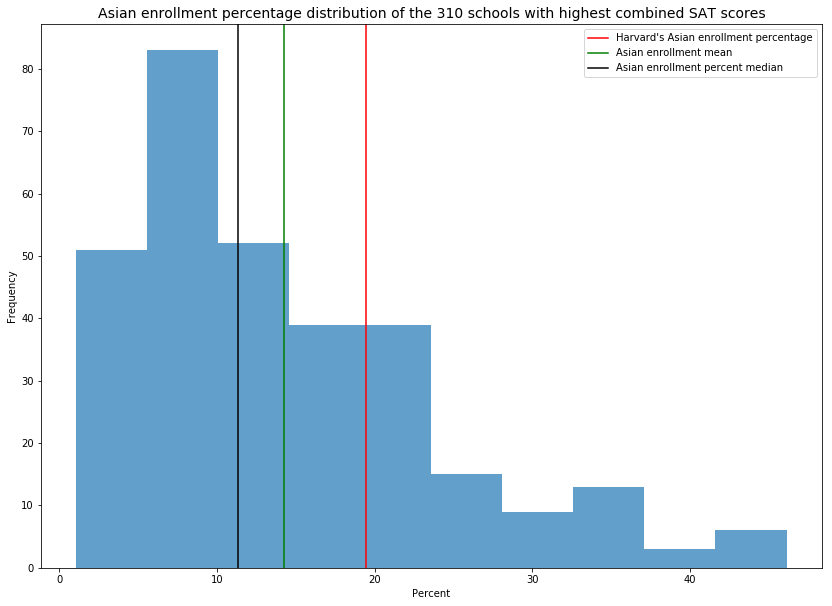

In [51]:
print ("Asian enrollment percent distribution mean: ",np.mean(df_sat2["Asian enrollment percentage"]))
print ("Asian enrollment percent distribution median: ",np.percentile(df_sat2["Asian enrollment percentage"],50))

plt.figure(figsize=(14,10))
plt.hist(df_sat2["Asian enrollment percentage"],alpha=0.7)
plt.axvline(19.42,color='r',label="Harvard's Asian enrollment percentage")
plt.axvline(np.mean(df_sat2["Asian enrollment percentage"]),color='g',label='Asian enrollment mean')
plt.axvline(np.percentile(df_sat2["Asian enrollment percentage"],50),color='black',label='Asian enrollment percent median')
plt.title("Asian enrollment percentage distribution of the 310 schools with highest combined SAT scores",size=14)
plt.xlabel("Percent")
plt.ylabel("Frequency")
plt.legend()
plt.show()

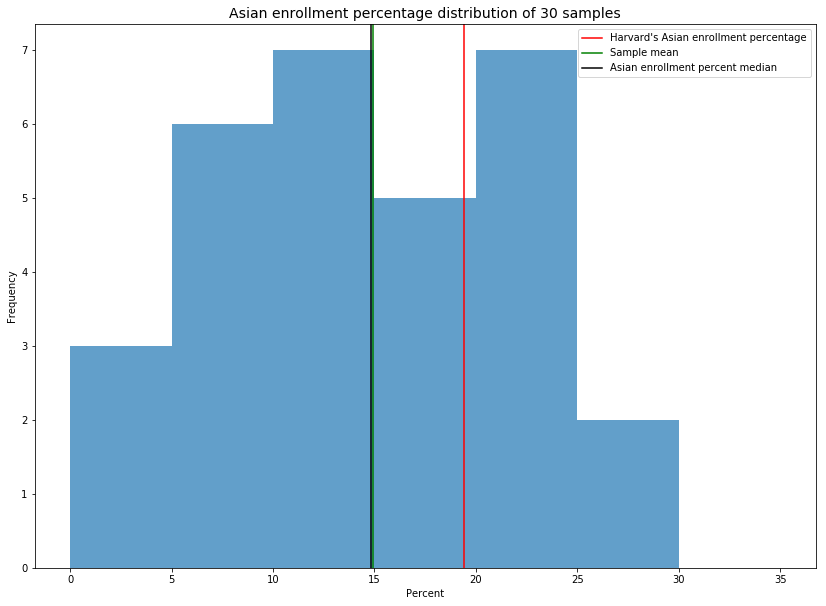

In [52]:
plt.figure(figsize=(14,10))
df_sat2_sample = df_sat2.sample(n=30,random_state=15,replace=False)
pdf = st.norm.pdf(df_sat2_sample["Asian enrollment percentage"])
plt.hist(df_sat2_sample["Asian enrollment percentage"],range=(0,35),bins=7,alpha=0.7)
plt.axvline(19.42,color='r',label="Harvard's Asian enrollment percentage")
plt.axvline(np.mean(df_sat2_sample["Asian enrollment percentage"]),color='g',label='Sample mean')
plt.axvline(np.percentile(df_sat2_sample["Asian enrollment percentage"],50),color='black',label='Asian enrollment percent median')
plt.title("Asian enrollment percentage distribution of 30 samples",size=14)
plt.xlabel("Percent")
plt.ylabel("Frequency")
plt.legend()
plt.show()

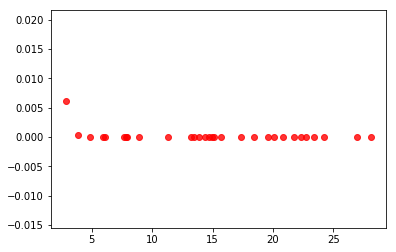

In [53]:
plt.scatter(df_sat2_sample["Asian enrollment percentage"],pdf,color='red',alpha=0.8)
plt.show()

In [54]:
df_sat2_sample.describe()

,ID,SAT reading median score,SAT math median score,Total undergraduate enrollment,Asian enrollment percentage,Total Asian enrollment,Combined SAT score
count,30.000000,19.000000,19.000000,30.000000,30.000000,30.000000,19.000000
mean,182811.466667,616.842105,632.894737,19817.366667,14.942667,2757.437883,1249.736842
std,53619.441545,60.626601,73.358249,12150.766034,7.144071,2166.725682,125.648028
min,110574.000000,540.000000,530.000000,4860.000000,2.890000,735.804000,1070.000000
25%,140828.750000,582.500000,582.500000,10587.250000,8.142500,1147.979500,1165.000000
50%,185563.000000,595.000000,615.000000,17572.500000,14.825000,1722.837350,1205.000000
75%,207627.750000,635.000000,672.500000,25624.250000,20.625000,3932.317725,1307.500000
max,377555.000000,755.000000,775.000000,56366.000000,28.100000,8709.314000,1530.000000


### Confidence Interval

In [100]:
#Total dataset
ci_total = st.norm.interval(0.95, loc=np.mean(df_sat2["Asian enrollment percentage"]), scale=np.std(df_sat2["Asian enrollment percentage"]))

#Sampled data
ci_sample = st.norm.interval(0.95, loc=np.mean(df_sat2_sample["Asian enrollment percentage"]), scale=np.std(df_sat2_sample["Asian enrollment percentage"]))

print ("Total dataset CI: ",ci_total)
print ("Sample dataset CI: ",ci_sample)

Total dataset CI:  (-4.6271611337503007, 33.184257907943866)
Sample dataset CI:  (1.1758912348476667, 28.70944209848566)


### Visualizing confidence intervals

#### Total dataset

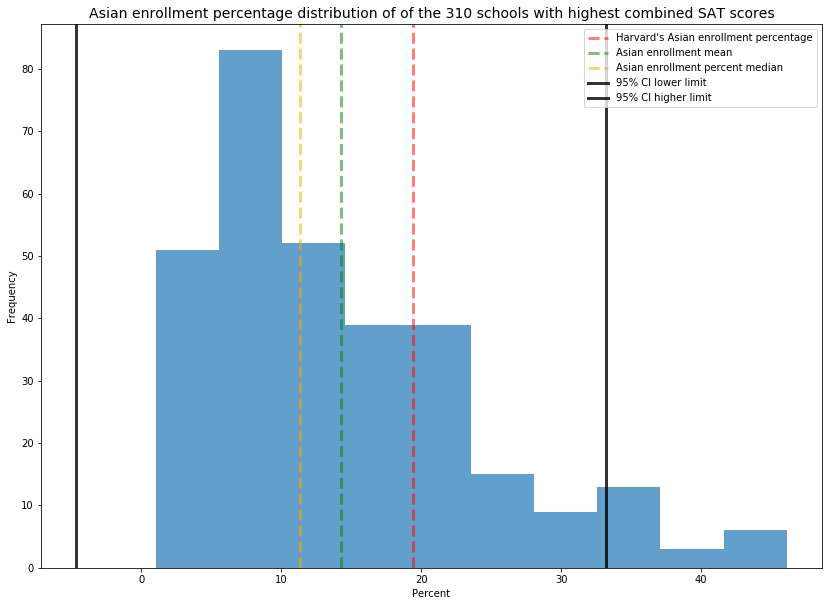

In [102]:
plt.figure(figsize=(14,10))
plt.hist(df_sat2["Asian enrollment percentage"],alpha=0.7)
plt.axvline(19.42,color='r',label="Harvard's Asian enrollment percentage",linestyle="--",linewidth=3,alpha=0.5)
plt.axvline(np.mean(df_sat2["Asian enrollment percentage"]),color='g',label='Asian enrollment mean',linestyle="--",linewidth=3,alpha=0.5)
plt.axvline(np.percentile(df_sat2["Asian enrollment percentage"],50),color='orange',label='Asian enrollment percent median',linestyle="--",linewidth=3,alpha=0.5)
plt.axvline(ci_total[0],color='black',label='95% CI lower limit',linestyle="-",linewidth=3,alpha=0.8)
plt.axvline(ci_total[1],color='black',label='95% CI higher limit',linestyle="-",linewidth=3,alpha=0.8)
plt.title("Asian enrollment percentage distribution of of the 310 schools with highest combined SAT scores",size=14)
plt.xlabel("Percent")
plt.ylabel("Frequency")
plt.legend()
plt.show()

#### Sampled set

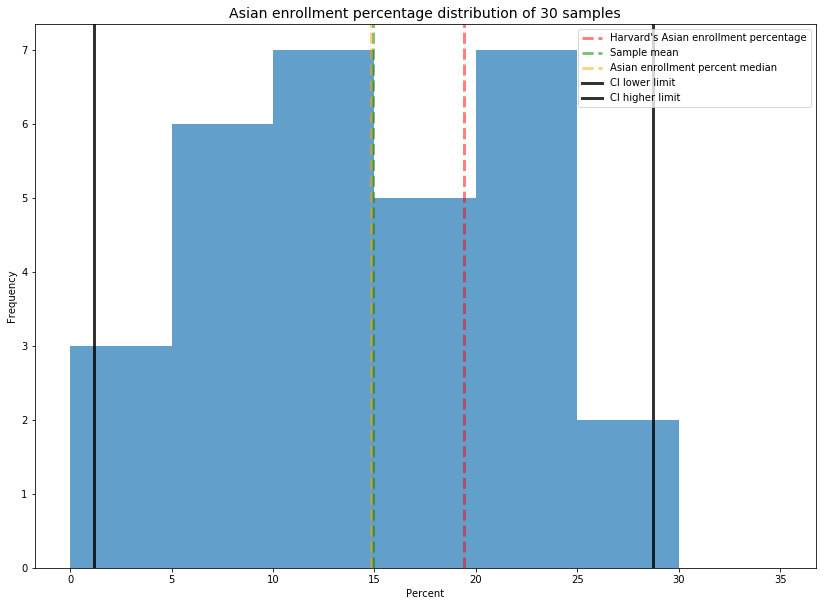

In [103]:
plt.figure(figsize=(14,10))
plt.hist(df_sat2_sample["Asian enrollment percentage"],range=(0,35),bins=7,alpha=0.7)
plt.axvline(19.42,color='r',label="Harvard's Asian enrollment percentage",linestyle="--",linewidth=3,alpha=0.5)
plt.axvline(np.mean(df_sat2_sample["Asian enrollment percentage"]),color='g',label='Sample mean',linestyle="--",linewidth=3,alpha=0.5)
plt.axvline(np.percentile(df_sat2_sample["Asian enrollment percentage"],50),color='orange',label='Asian enrollment percent median',linestyle="--",linewidth=3,alpha=0.5)
plt.axvline(ci_sample[0],color='black',label='CI lower limit',linestyle="-",linewidth=3,alpha=0.8)
plt.axvline(ci_sample[1],color='black',label='CI higher limit',linestyle="-",linewidth=3,alpha=0.8)
plt.title("Asian enrollment percentage distribution of 30 samples",size=14)
plt.xlabel("Percent")
plt.ylabel("Frequency")
plt.legend()
plt.show()

### Hypothesis testing

#### Null hypothesis (H0): population mean = Harvard's score (0.1942)
#### Alternate hypothesis (HA): population mean < Harvard's score

In [99]:
t,p = st.ttest_1samp(df_sat2["Asian enrollment percentage"],19.42)
pvalue = st.t.cdf(t,len(df_sat2["Asian enrollment percentage"])-1)
print ("Right sided t-statistic: ",t)
print ("Right sided p-value: ",pvalue)

Right sided t-statistic:  -9.36957955035
Right sided p-value:  7.9336777617e-19


In [96]:
t,p = st.ttest_1samp(df_sat2_sample["Asian enrollment percentage"],19.42)
pvalue = st.t.cdf(t,len(df_sat2_sample["Asian enrollment percentage"])-1)
print ("Right sided t-statistic: ",t)
print ("Right sided p-value: ",pvalue)

Right sided t-statistic:  -3.43268767156
Right sided p-value:  0.000909287397644


### Visualizing p-value

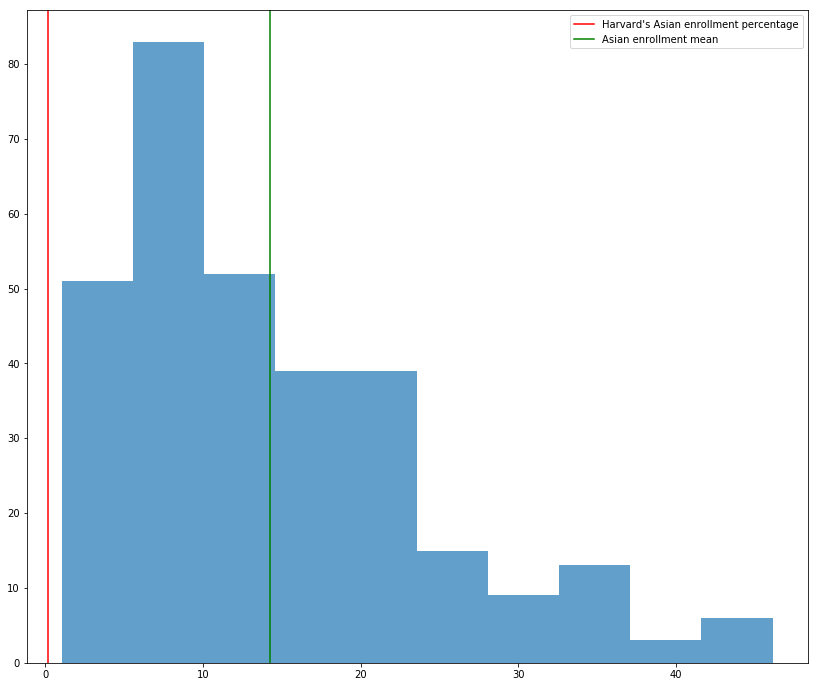

In [60]:
plt.figure(figsize=(14,12))
plt.hist(df_sat2["Asian enrollment percentage"],alpha=0.7)
plt.axvline(0.1942,color='r',label="Harvard's Asian enrollment percentage")
plt.axvline(np.mean(df_sat2["Asian enrollment percentage"]),color='g',label='Asian enrollment mean')
plt.title("Asian enrollment percentage distribution of 30 samples",size=14)
plt.xlabel("Percent")
plt.ylabel("Frequency")
plt.legend()
plt.show()

### Reasons for analyzing the entire population
- Small population size (310 observations)
- Uncommon characteristics between observations: Each college has unique attributes

#### Note: when sampling the entire population (non-probability sampling), *statistical generalizations* cannot be made but *analytical generalizations* can be made. This basically means that statistical inference cannot be generalized but researach or insight from the data can be gained. 